In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.ndimage import gaussian_filter

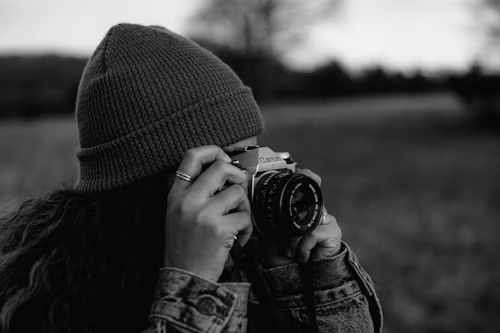

In [ ]:
rose_img=cv2.imread('/content/photo-1575936123452-b67c3203c357.avif')
rose_img_gray=cv2.cvtColor(rose_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(rose_img_gray)

In [ ]:
float_img=rose_img_gray.astype(np.float32)

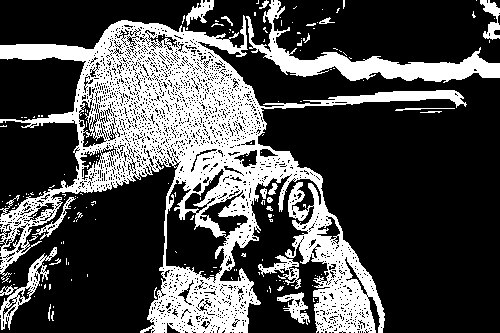

In [ ]:
X_kernal=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Y_kernal=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

def apply_filter(img,kernal_x,kernal_y):
  pad=1
  padded_img=np.pad(img, pad_width=pad, mode='reflect')
  grad_x=np.zeros_like(img)
  grad_y=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      region = padded_img[i:i+3, j:j+3]
      grad_x[i,j]=np.sum(region*X_kernal)
      grad_y[i,j]=np.sum(region*Y_kernal)
  return grad_x,grad_y

def magnitude(grad_x,grad_y,img):
  magnitude_mat=np.zeros_like(img)
  for i in range(grad_x.shape[0]):
    for j in range(grad_x.shape[1]):
       magnitude_mat[i,j]=np.sqrt(grad_x[i,j]**2 + grad_y[i,j]**2)
  return magnitude_mat

def edge_thres(magnitude_mat,img):
  final_img=np.zeros_like(img)
  thres=np.mean(magnitude_mat)
  for i in range(magnitude_mat.shape[0]):
    for j in range(magnitude_mat.shape[1]):
      if magnitude_mat[i,j]>thres:
        final_img[i,j]=255
      else:
        final_img[i,j]=0
  return final_img

def img_to_edge(img):
  grad_x,grad_y=apply_filter(img,X_kernal,Y_kernal)
  magnitude_img=magnitude(grad_x,grad_y,img)
  final_img=edge_thres(magnitude_img,img)
  return final_img

edges=img_to_edge(float_img)

cv2_imshow(edges)

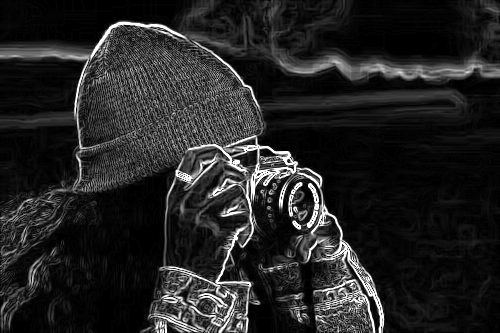

In [ ]:
X_kernal=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Y_kernal=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

def apply_filter(img,kernal_x,kernal_y):
  pad=1
  padded_img=np.pad(img, pad_width=pad, mode='reflect')
  grad_x=np.zeros_like(img)
  grad_y=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      region = padded_img[i:i+3, j:j+3]
      grad_x[i,j]=np.sum(region*X_kernal)
      grad_y[i,j]=np.sum(region*Y_kernal)
  return grad_x,grad_y

def magnitude(grad_x,grad_y,img):
  magnitude_mat=np.zeros_like(img)
  for i in range(grad_x.shape[0]):
    for j in range(grad_x.shape[1]):
       magnitude_mat[i,j]=np.sqrt(grad_x[i,j]**2 + grad_y[i,j]**2)
  return magnitude_mat

"""def edge_thres(magnitude_mat,img):
  final_img=np.zeros_like(img)
  thres=np.mean(magnitude_mat)
  for i in range(magnitude_mat.shape[0]):
    for j in range(magnitude_mat.shape[1]):
      if magnitude_mat[i,j]>thres:
        final_img[i,j]=255
      else:
        final_img[i,j]=0
  return final_img """

def img_to_edge(img):
  grad_x,grad_y=apply_filter(img,X_kernal,Y_kernal)
  magnitude_img=magnitude(grad_x,grad_y,img)
  return magnitude_img

edges=img_to_edge(float_img)

cv2_imshow(edges)